In [1]:
import os

from src.video.parameters import Parameters
from src.stitching.video2dataset_mine import Video2Dataset
import glob
work_dir = os.getcwd()

args= { 

    "input": f"C:/Users/gbo10/Dropbox/research videos/31.12/65-31.12/GX010065.MP4",
    "output": f"C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/10.04.2024-splitted videos",
    "start": 0,
    "end": None,
    "output_resolution": None,
    "blur_threshold":50,
    "distance_threshold":40,
    "black_ratio_threshold": None,
    "pixel_black_threshold": None,
    "use-srt": None,
    "limit": None,
    "frame_format": "jpg",
    "stats_file":"output/stats.csv"}


video_paths = []  # Initialize an empty list to store the video paths

for video_path in glob.glob("C:/Users/gbo10/Dropbox/research videos/car-current/april 2024/10.4.2024/*.mp4"):
    video_paths.append(video_path)


for video_path in video_paths:
    args["input"] = video_path
    print(f'Processing video {video_path}')
    Video2Dataset2process = Video2Dataset(Parameters(args))
    Video2Dataset2process.ProcessVideo()



Processing video C:/Users/gbo10/Dropbox/research videos/car-current/april 2024/7.4.2024/29 lux- 9am\GX010151.MP4
before stats file
after stats file
output/stats.csv
output/stats.csv
Processing video C:/Users/gbo10/Dropbox/research videos/car-current/april 2024/7.4.2024/29 lux- 9am\GX010152.MP4
before stats file
after stats file
output/stats.csv
output/stats.csv
Processing video C:/Users/gbo10/Dropbox/research videos/car-current/april 2024/7.4.2024/29 lux- 9am\GX010153.MP4
before stats file
after stats file
output/stats.csv
output/stats.csv
Processing video C:/Users/gbo10/Dropbox/research videos/car-current/april 2024/7.4.2024/29 lux- 9am\GX010154.MP4
before stats file
after stats file
output/stats.csv
output/stats.csv


In [2]:
import pickle

def load_progress(save_file='C:/Users/gbo10/Videos/research/counting_research_algorithms/src/measurements/calibration_data.pkl'):
    try:
        with open(save_file, 'rb') as f:
            data = pickle.load(f)
        return data['objpoints'], data['imgpoints'], data['image_files']
    except (FileNotFoundError, EOFError):
        return [], [], []
objpoints, imgpoints, image_files_used = load_progress()
len(objpoints), len(imgpoints), len(image_files_used)

(27, 27, 27)

In [3]:
import cv2
frameSize = (5312,2988)
#flags=calibration_flags
calibration_flags = (cv2.CALIB_RATIONAL_MODEL |  # Use 3 radial distortion coefficients
                     cv2.CALIB_FIX_TANGENT_DIST |  # Fix the tangential distortion; use this flag if you want to assume it's negligible
                     cv2.CALIB_FIX_K3 |  # Fix the third radial distortion coefficient; remove this if estimating it is necessary
                     cv2.CALIB_FIX_K4 |  # Fix the fourth radial distortion coefficient; remove this if estimating it is necessary
                     cv2.CALIB_FIX_K5) 
ret, cameraMatrix, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, frameSize, None, None,flags=calibration_flags)
print("\n")
print("Calibration error: ", ret)
print("Camera Matrix:\n")
print(cameraMatrix)
print("\n")
print("Distortion Coefficients:\n")
print(dist)
print("\n")
print("Rotation Vectors:\n")
print(rvecs)
print("\n")
print("Translation Vectors:\n")
print(tvecs)
print("\n")




Calibration error:  4.254408581865244
Camera Matrix:

[[5.20850915e+04 0.00000000e+00 2.86828357e+03]
 [0.00000000e+00 6.22906961e+04 1.77034479e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


Distortion Coefficients:

[[ -33.62684932 9161.49973304    0.            0.            0.
     0.            0.          -35.24138477    0.            0.
     0.            0.            0.            0.        ]]


Rotation Vectors:

(array([[-0.58636463],
       [-0.06182887],
       [-0.19535923]]), array([[-0.43471949],
       [-0.4997866 ],
       [-1.62289004]]), array([[ 0.11491986],
       [-0.94680271],
       [ 2.83714414]]), array([[-0.46155389],
       [-0.47425333],
       [-1.75665341]]), array([[-1.16090557],
       [ 0.70475458],
       [ 1.40370032]]), array([[ 0.20658419],
       [-0.69993576],
       [ 2.502459  ]]), array([[-0.713073  ],
       [-1.151595  ],
       [-1.26767366]]), array([[-1.16686259],
       [ 0.34317472],
       [-0.19116877]]), array([[-0.034130

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to create an artificial checkerboard image for overlay purposes
def create_checkerboard(num_rows, num_cols, square_size):
    checkerboard = np.zeros((num_rows*square_size, num_cols*square_size), dtype=np.uint8)
    flag = 0
    for y in range(0, num_rows):
        for x in range(0, num_cols):
            if flag == 0:
                checkerboard[y*square_size:(y+1)*square_size, x*square_size:(x+1)*square_size] = 255
            flag = (flag + 1) % 2
        flag = (flag + 1) % 2
    return checkerboard

# Load the distorted image
distorted_img = cv2.imread('C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010075_1_74.jpg')

# Camera matrix (intrinsic parameters)
K = cameraMatrix

# Distortion coefficients
distCoeffs = dist

# Undistort the image
undistorted_img = cv2.undistort(distorted_img, K, distCoeffs)

# Overlay a checkerboard pattern onto the undistorted image for visualization
# Assuming you have the pattern size (number of corners per row and column)
num_rows, num_cols = 7, 9  # for example, a 7x9 checkerboard
square_size = 30  # size of a square in pixels

# Create an artificial checkerboard image
checkerboard = create_checkerboard(num_rows, num_cols, square_size)

# Make the artificial checkerboard image 3-channel to overlay on the undistorted image
checkerboard = cv2.cvtColor(checkerboard, cv2.COLOR_GRAY2BGR)

# Overlay the checkerboard on the undistorted image, you can adjust the position as needed
x_offset, y_offset = 50, 50  # offsets to position the checkerboard on the undistorted image
overlay_img = undistorted_img.copy()
overlay_img[y_offset:y_offset+checkerboard.shape[0], x_offset:x_offset+checkerboard.shape[1]] = checkerboard

# Show the result
cv2.imshow('Undistorted Image with Overlay', overlay_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


total error: 0.5235255974833123


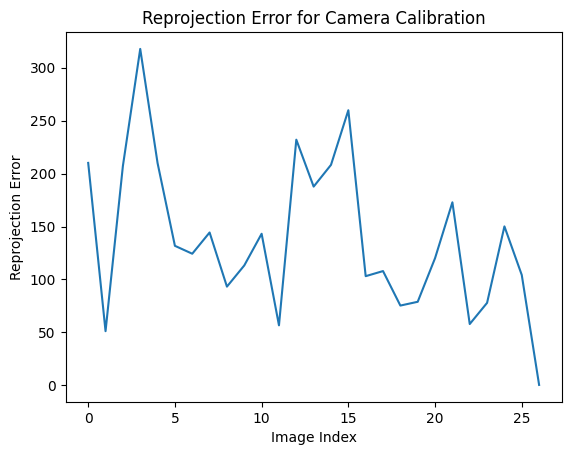

In [18]:



############## CALIBRATION #######################################################




############## UNDISTORTION #####################################################

img = cv2.imread("C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/2.1.2024-splitted videos/GX010094_1_108.jpg")
h,  w = img.shape[:2]
newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(cameraMatrix, dist, (w,h), 1, (w,h))



# # Undistort
# dst = cv.undistort(img, cameraMatrix, dist, None, newCameraMatrix)

# # # crop the image
# x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]
# cv.imwrite('caliResult1.png', dst)



# Undistort with Remapping
mapx, mapy = cv2.initUndistortRectifyMap(cameraMatrix, dist, None, newCameraMatrix, (w,h), 5)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('caliResult2.png', dst)
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.imshow('caliResult2.png', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()




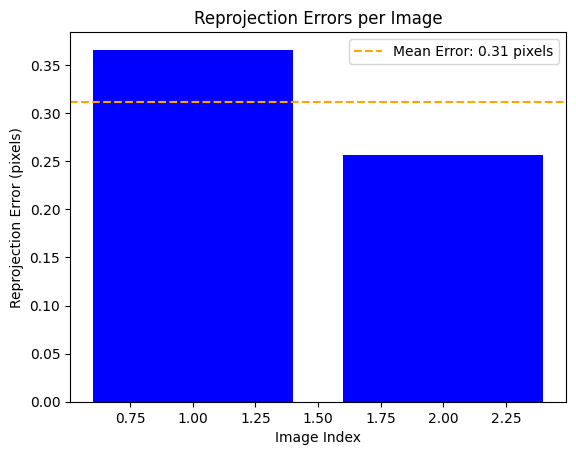

In [36]:
reprojection_errors = []
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], cameraMatrix, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    reprojection_errors.append(error)

# Now, plot the reprojection errors
num_images = len(reprojection_errors)
image_indices = np.arange(1, num_images + 1)
mean_error = np.mean(reprojection_errors)

# Create the bar plot
plt.bar(image_indices, reprojection_errors, color='blue')
plt.axhline(y=mean_error, color='orange', linestyle='--', label=f'Mean Error: {mean_error:.2f} pixels')

# Add labels and title
plt.xlabel('Image Index')
plt.ylabel('Reprojection Error (pixels)')
plt.title('Reprojection Errors per Image')
plt.legend()

# Show the plot
plt.show()

In [31]:
#error in mm
error_mm = mean_error * 0.2645833333333333
error_mm

0.14146407991338028

In [29]:
# imagefile name and error
image_errors = list(zip(image_files_used, reprojection_errors))

# Sort the image errors by the reprojection error
sorted_image_errors = sorted(image_errors, key=lambda x: x[1], reverse=False)

# Display the top 10 images with the highest reprojection error
for i, (image_file, error) in enumerate(sorted_image_errors[:10]):
    print(f'{i + 1}. {image_file}: {error:.2f} pixels')

1. C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010065_12_476.jpg: 0.25 pixels
2. C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010068_30_1105.jpg: 0.26 pixels
3. C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010067_14_1505.jpg: 0.32 pixels
4. C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010069_7_195.jpg: 0.32 pixels
5. C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010068_4_73.jpg: 0.34 pixels
6. C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010069_30_1306.jpg: 0.35 pixels
7. C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010065_4_306.jpg: 0.36 pixels
8. C:/Users/gbo10/OneDrive/research/italy/torino/computer vision/31.12.2023-splitted videos\GX010065_11_454.jpg: 0.37 pixels
9

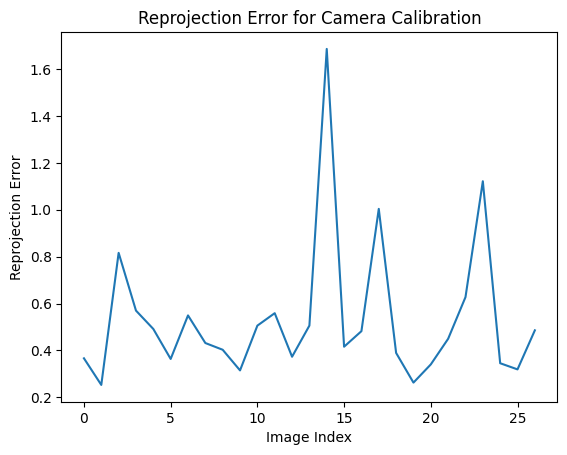

In [27]:
import matplotlib.pyplot as plt

# Example reprojection errors for each image
reprojection_errors = [cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2) for i in range(len(objpoints))]

import matplotlib.pyplot as plt
import numpy as np

# Image resolution (width, height)
resolution = (5312, 2988)
# Calculate the image diagonal
image_diagonal = np.sqrt(resolution[0]**2 + resolution[1]**2)

# Normalize the errors by the image diagonal to make them relative
relative_errors = [e / image_diagonal for e in reprojection_errors]

# Calculate the overall mean relative error
overall_mean_relative_error = sum(relative_errors) / len(relative_errors)

# Number of images
num_images = len(relative_errors)
image_indices = range(1, num_images + 1)

# Create the bar plot
plt.bar(image_indices, relative_errors, color='blue')

# Add a horizontal line for the overall mean relative error
plt.axhline(y=overall_mean_relative_error, color='orange', linestyle='--', label=f'Overall Mean Relative Error: {overall_mean_relative_error:.2e}')

# Add labels and title
plt.xlabel('Images')
plt.ylabel('Relative Error')
plt.title('Mean Relative Reprojection Error per Image')
plt.legend()

# Show the plot
plt.show()

